<a href="https://colab.research.google.com/github/javier-jaime/Tool-Crib/blob/master/Colab/Word_Count_with_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [1]:
!pip install wordcloud
!pip install pysrt
import pysrt

from google.colab import drive
from google.colab import files

import collections

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 104 kB 4.5 MB/s 
  Created wheel for pysrt: filename=pysrt-1.1.2-py3-none-any.whl size=13444 sha256=e306f99be685a3c46c536e7583c1809ab8d9f3103c188d467b89be559018b320
  Stored in directory: /root/.cache/pip/wheels/b2/f8/e8/a26be4111ab5ec931e845777e574d1483b4adddc50d3e591a6
Successfully built pysrt


Read the Data from a srt file extracted from youtube

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# open file from google drive with pysrt
subs = pysrt.open('drive/MyDrive/Colab Notebooks/Datasets/LWOL, May 25 2022.srt')

# Print Text in file
# for sub in subs:
#    print(sub.text)

In [11]:
# if you want to use you own stopwords, read file from Google Drive
stopwords = set(line.strip() for line in open('drive/MyDrive/Colab Notebooks/Datasets/stopwords'))

# create your data structure here.
wordcount={}

# Instantiate a dictionary, and for every word in the file, add to 
# the dictionary if it doesn't exist. If it does, increase the count.

# Hint: To eliminate duplicates, remember to split by punctuation, 
# and use case demiliters. The functions lower() and split() will be useful!

for word in subs.text.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

# after building your wordcount, you can then sort it and return the first
# n words.  If you want, collections.Counter may be useful.

d = collections.Counter(wordcount)

#print(d.most_common(50))
for word, count in d.most_common(50):
	print(word, ": ", count)

uh :  43
um :  41
people :  36
know :  34
one :  31
going :  28
want :  27
kind :  27
will :  25
web3 :  25
data :  25
community :  24
go :  23
now :  22
blockchain :  22
us :  19
right :  19
also :  18
calgary :  18
well :  17
think :  17
work :  16
find :  16
really :  16
web :  16
something :  16
alberta :  15
network :  15
got :  15
bitcoin :  15
way :  15
little :  14
crypto :  14
nfts :  14
block :  14
everyone :  13
anyone :  13
bit :  13
see :  13
make :  12
trust :  12
someone :  12
3 :  12
lot :  12
big :  12
done :  12
research :  12
today :  11
company :  11
world :  11


Create a Word Cloud

In [12]:
# Uncomment to read directly from a txt file
# subs_text = open('LWOL-March-30.txt', 'r').read() 

In [13]:
# Import stopwords from wordcloud or comment to use your own
stopwords = set(STOPWORDS)

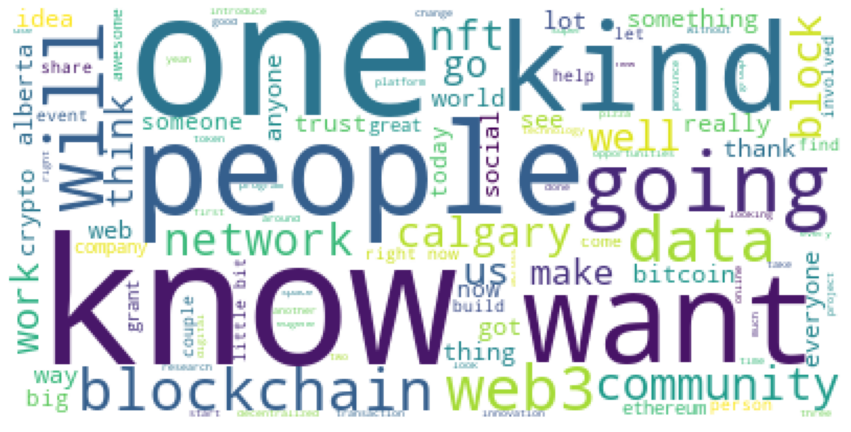

In [14]:
# instantiate a word cloud object
wc = WordCloud(
    background_color='white',
    max_words=100,
    stopwords=stopwords
)

# add new words to stopwords
stopwords.add('um')
stopwords.add('uh')

# generate the word cloud
wc.generate(subs.text)

fig = plt.figure()
fig.set_figwidth(15) # set width
fig.set_figheight(20) # set height

# display the word cloud
plt.imshow(wc)
plt.axis('off')
plt.show()